<a href="https://colab.research.google.com/github/satyadevb/MA323/blob/main/MA323_Lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The value of mu is  0.0002981060700200034 

The value of sigma is  0.02228172705870555 

For Lambda =  0.01 the stock price plot is



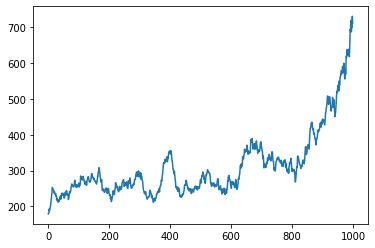

 
For Lambda =  0.05 the stock price plot is



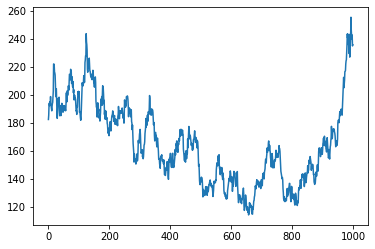

 
For Lambda =  0.1 the stock price plot is



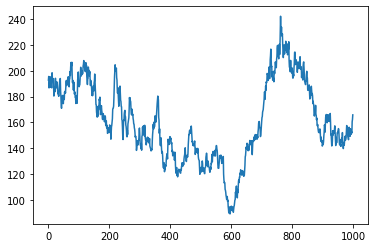

 
For Lambda =  0.2 the stock price plot is



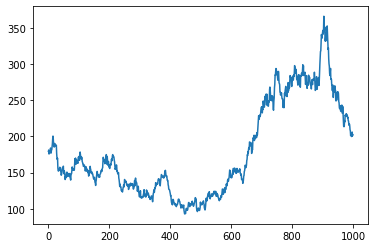

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import statistics
import random
import math
from scipy import stats
import time

closing_prices = [184.800003,185.449997,184.699997,188.050003,188.600006,191.899994,199.100006,195.600006,192.699997,186.050003,183.800003,186.25,188.199997,190.75,194.399994,
                192,198.25,191.949997,187.149994,189.449997,191.199997,186.550003,191.449997,192.25,191.600006,191.449997,190.949997,190.649994,193.800003,195.050003,203.300003,
                201.899994,196.5,193.100006,195.100006,197.050003,194.75,198.399994,201.449997,207.949997,
                209.850006,215.649994,224.850006,212,218.100006,216.25,213.149994,206.600006,207.899994,204.050003,194.850006,198.149994,202.699997,198.5,200.149994,
                198.199997,195.449997,192.600006,185.800003,186.199997,183.800003,176.350006,182.199997,187.25,185.050003,185.399994]

lambda_list = [0.01,0.05,0.1,0.2]

ulist = []

for i in range(len(closing_prices) - 1):
    ulist.append(np.log(closing_prices[i + 1]/closing_prices[i]))

sum = 0
for u in ulist:
    sum+= u
ex = sum/len(ulist)

sum = 0
for u in ulist:
    sum+= (u - ex)**2
sigma_square = sum/(len(ulist) - 1)

mu = ex + sigma_square/2
sigma = math.sqrt(sigma_square)

print("The value of mu is ",mu,"\n")
print("The value of sigma is ",sigma,"\n")

Starting_price = closing_prices[len(closing_prices)-1]

def log_norm(N):
  sum = 0
  for i in range(N):
    sum = sum + (mu + sigma * np.random.normal(0,1,1)[0])
  return sum

Starting_price = closing_prices[len(closing_prices)-1]

for Lambda in lambda_list:
    print("For Lambda = ",Lambda,"the stock price plot is\n")
    Stock = Starting_price
    Stock_list = []
    
    for i in range(1000):
        Z = np.random.normal(0,1,1)[0]
        N = np.random.poisson(Lambda,1)[0]
        if N == 0:
            Stock = Stock * math.exp((mu - 0.5 * (sigma**2)) + sigma * Z)
            Stock_list.append(Stock)
        if N != 0:
            Stock = Stock * math.exp(log_norm(N) + (mu - 0.5 *(sigma**2)) + sigma * Z)
            Stock_list.append(Stock)

    plt.plot(Stock_list)
    plt.show()
    print(" ")
